# Predicting Car Classes: A Multi-Class Classification Dataset

## Import Libraries

In [ ]:
#data loading and manipulation
import pandas as pd

##train test split
from sklearn.model_selection import train_test_split

#encoding
from sklearn.preprocessing import OneHotEncoder

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

# for replacing null values
import numpy as np

#scaling
from sklearn.preprocessing import StandardScaler

#feature extraction
from sklearn.decomposition import PCA


#algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Evaluation
from sklearn.metrics import f1_score , plot_confusion_matrix,confusion_matrix, accuracy_score

#Parameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## Load Data

In [ ]:
#load the data
cars = pd.read_csv("cars_class.csv")

In [ ]:
#view the data
cars.head()

,ID,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,1,88,39,70,166,66,7,148,44,19,134,167,332,143,69,5,13,193,201,0
1,2,85,35,64,129,57,6,116,57,17,125,138,200,123,65,1,23,196,203,3
2,3,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,3
3,4,102,54,98,177,56,10,219,31,25,171,219,706,223,72,5,17,186,196,1
4,5,87,39,74,152,58,6,151,44,19,136,174,337,140,70,1,33,187,196,2


## Exploratory Data Analysis

In [ ]:
#check for shape of the data
cars.shape

(719, 20)

In [ ]:
#check for basic information
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ID            719 non-null    int64
 1   Comp          719 non-null    int64
 2   Circ          719 non-null    int64
 3   D.Circ        719 non-null    int64
 4   Rad.Ra        719 non-null    int64
 5   Pr.Axis.Ra    719 non-null    int64
 6   Max.L.Ra      719 non-null    int64
 7   Scat.Ra       719 non-null    int64
 8   Elong         719 non-null    int64
 9   Pr.Axis.Rect  719 non-null    int64
 10  Max.L.Rect    719 non-null    int64
 11  Sc.Var.Maxis  719 non-null    int64
 12  Sc.Var.maxis  719 non-null    int64
 13  Ra.Gyr        719 non-null    int64
 14  Skew.Maxis    719 non-null    int64
 15  Skew.maxis    719 non-null    int64
 16  Kurt.maxis    719 non-null    int64
 17  Kurt.Maxis    719 non-null    int64
 18  Holl.Ra       719 non-null    int64
 19  Class         719 non-null   

In [ ]:
#check for statistical details
cars.describe()

,ID,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
count,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000
mean,360.000000,93.435327,44.851182,81.723227,168.579972,61.847010,8.625869,168.137691,41.075104,20.531293,148.030598,188.168289,436.215577,174.726008,72.682893,6.343533,12.394993,188.798331,195.407510,1.470097
std,207.701709,8.111406,6.150286,15.528208,33.809172,8.259136,4.916908,32.937591,7.764459,2.560969,14.560092,31.235395,174.964977,32.149568,7.542055,4.856169,8.742511,6.048522,7.235166,1.126477
min,1.000000,73.000000,33.000000,40.000000,105.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000,0.000000
25%,180.500000,87.000000,40.000000,70.000000,141.000000,57.000000,6.000000,146.000000,33.000000,19.000000,137.000000,167.000000,317.000000,149.000000,68.000000,2.000000,5.500000,184.000000,190.000000,0.000000
50%,360.000000,93.000000,44.000000,79.000000,166.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.000000,362.000000,174.000000,72.000000,6.000000,11.000000,188.000000,196.000000,1.000000
75%,539.500000,99.000000,49.000000,96.000000,194.500000,65.000000,10.000000,197.500000,46.000000,23.000000,159.000000,216.000000,584.500000,198.000000,76.000000,9.000000,18.000000,193.000000,201.000000,2.000000
max,719.000000,119.000000,59.000000,110.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,262.000000,135.000000,22.000000,41.000000,204.000000,211.000000,3.000000


In [ ]:
#check for duplicate values
cars.duplicated().sum()

0

In [ ]:
#check for null values
cars.isnull().sum()

ID              0
Comp            0
Circ            0
D.Circ          0
Rad.Ra          0
Pr.Axis.Ra      0
Max.L.Ra        0
Scat.Ra         0
Elong           0
Pr.Axis.Rect    0
Max.L.Rect      0
Sc.Var.Maxis    0
Sc.Var.maxis    0
Ra.Gyr          0
Skew.Maxis      0
Skew.maxis      0
Kurt.maxis      0
Kurt.Maxis      0
Holl.Ra         0
Class           0
dtype: int64

this indicates that the dataset does not have any null values

###### Based on the dataset, the target variable is represented by the 'class' column.

In [ ]:
#distribution of class column
cars["Class"].value_counts()

0    189
1    180
3    177
2    173
Name: Class, dtype: int64

To visualize and gain insights into the target column 'class', you can create a bar plot to observe the distribution of different class labels  and the pie chart to observe class proportions . This will help you understand the proportion of each class in the dataset.

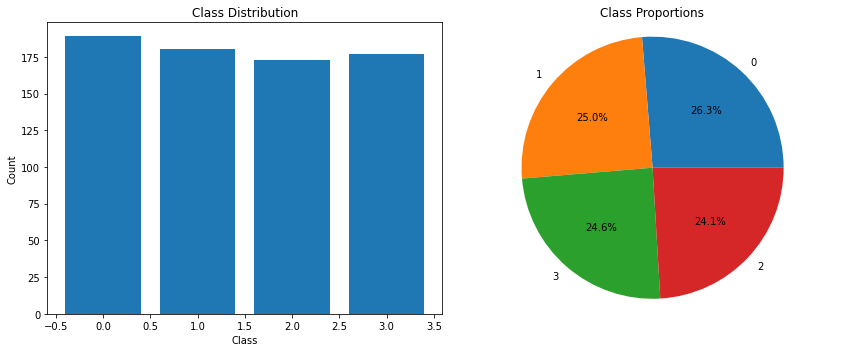

In [ ]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar graph of class distribution
class_counts = cars['Class'].value_counts()
axes[0].bar(class_counts.index, class_counts.values)
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')
axes[0].set_title('Class Distribution')

# Pie chart of class proportions
class_proportions = cars['Class'].value_counts(normalize=True)
axes[1].pie(class_proportions, labels=class_proportions.index, autopct='%1.1f%%')
axes[1].set_title('Class Proportions')
axes[1].axis('equal')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


The value counts analysis and the visualization indicates that the distribution of classes in the dataset is relatively balanced. Therefore, it suggests that there is no need for data balancing techniques to address class imbalance.

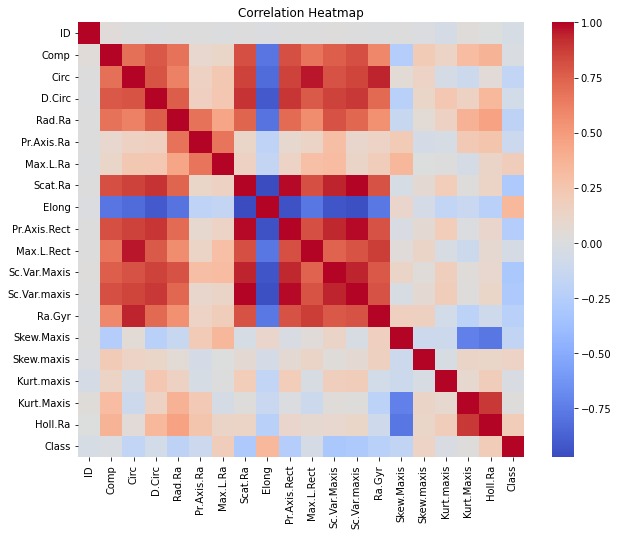

In [ ]:
# correlation_matrix

correlation_matrix = cars.corr()
plt.figure(figsize=(10, 8))  # Set the figure size to 10x8
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
correlation_matrix = cars.corr()
correlation_matrix

,ID,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
ID,1.000000,0.043776,0.017917,-0.000686,0.017955,0.016032,-0.001560,0.014859,-0.006429,0.016642,0.016799,0.022318,0.020176,0.004570,0.019601,-0.008888,-0.041922,0.029385,0.006687,-0.033656
Comp,0.043776,1.000000,0.685515,0.782416,0.681598,0.098000,0.120446,0.807686,-0.784352,0.808425,0.669999,0.756467,0.813816,0.584643,-0.249420,0.213224,0.136192,0.315362,0.370891,-0.015112
Circ,0.017917,0.685515,1.000000,0.799001,0.621623,0.156770,0.234471,0.860339,-0.828911,0.857357,0.965119,0.803929,0.851841,0.938749,0.053117,0.137134,-0.041619,-0.103991,0.050379,-0.171417
D.Circ,-0.000686,0.782416,0.799001,1.000000,0.764652,0.168777,0.240817,0.905598,-0.910257,0.894926,0.773701,0.858005,0.887997,0.715118,-0.227167,0.118065,0.240566,0.155967,0.342472,-0.070422
Rad.Ra,0.017955,0.681598,0.621623,0.764652,1.000000,0.679403,0.447076,0.736257,-0.788814,0.708706,0.565054,0.805961,0.725038,0.549433,-0.137810,0.053169,0.154588,0.382966,0.463067,-0.198390
Pr.Axis.Ra,0.016032,0.098000,0.156770,0.168777,0.679403,1.000000,0.669598,0.117125,-0.193680,0.089976,0.134261,0.305815,0.104121,0.137493,0.208299,-0.054422,-0.035425,0.228666,0.257122,-0.110222
Max.L.Ra,-0.001560,0.120446,0.234471,0.240817,0.447076,0.669598,1.000000,0.146370,-0.157702,0.142009,0.291938,0.319976,0.125102,0.188278,0.348971,0.009765,0.018541,-0.045766,0.123778,0.190215
Scat.Ra,0.014859,0.807686,0.860339,0.905598,0.736257,0.117125,0.146370,1.000000,-0.973523,0.991787,0.809629,0.945460,0.996412,0.804632,-0.033373,0.068231,0.191242,0.021518,0.131811,-0.289056
Elong,-0.006429,-0.784352,-0.828911,-0.910257,-0.788814,-0.193680,-0.157702,-0.973523,1.000000,-0.949891,-0.773279,-0.932824,-0.957282,-0.771836,0.106339,-0.053248,-0.165277,-0.131054,-0.230072,0.338634
Pr.Axis.Rect,0.016642,0.808425,0.857357,0.894926,0.708706,0.089976,0.142009,0.991787,-0.949891,1.000000,0.812405,0.931380,0.992075,0.801218,-0.022921,0.074895,0.194278,-0.006111,0.109542,-0.254703


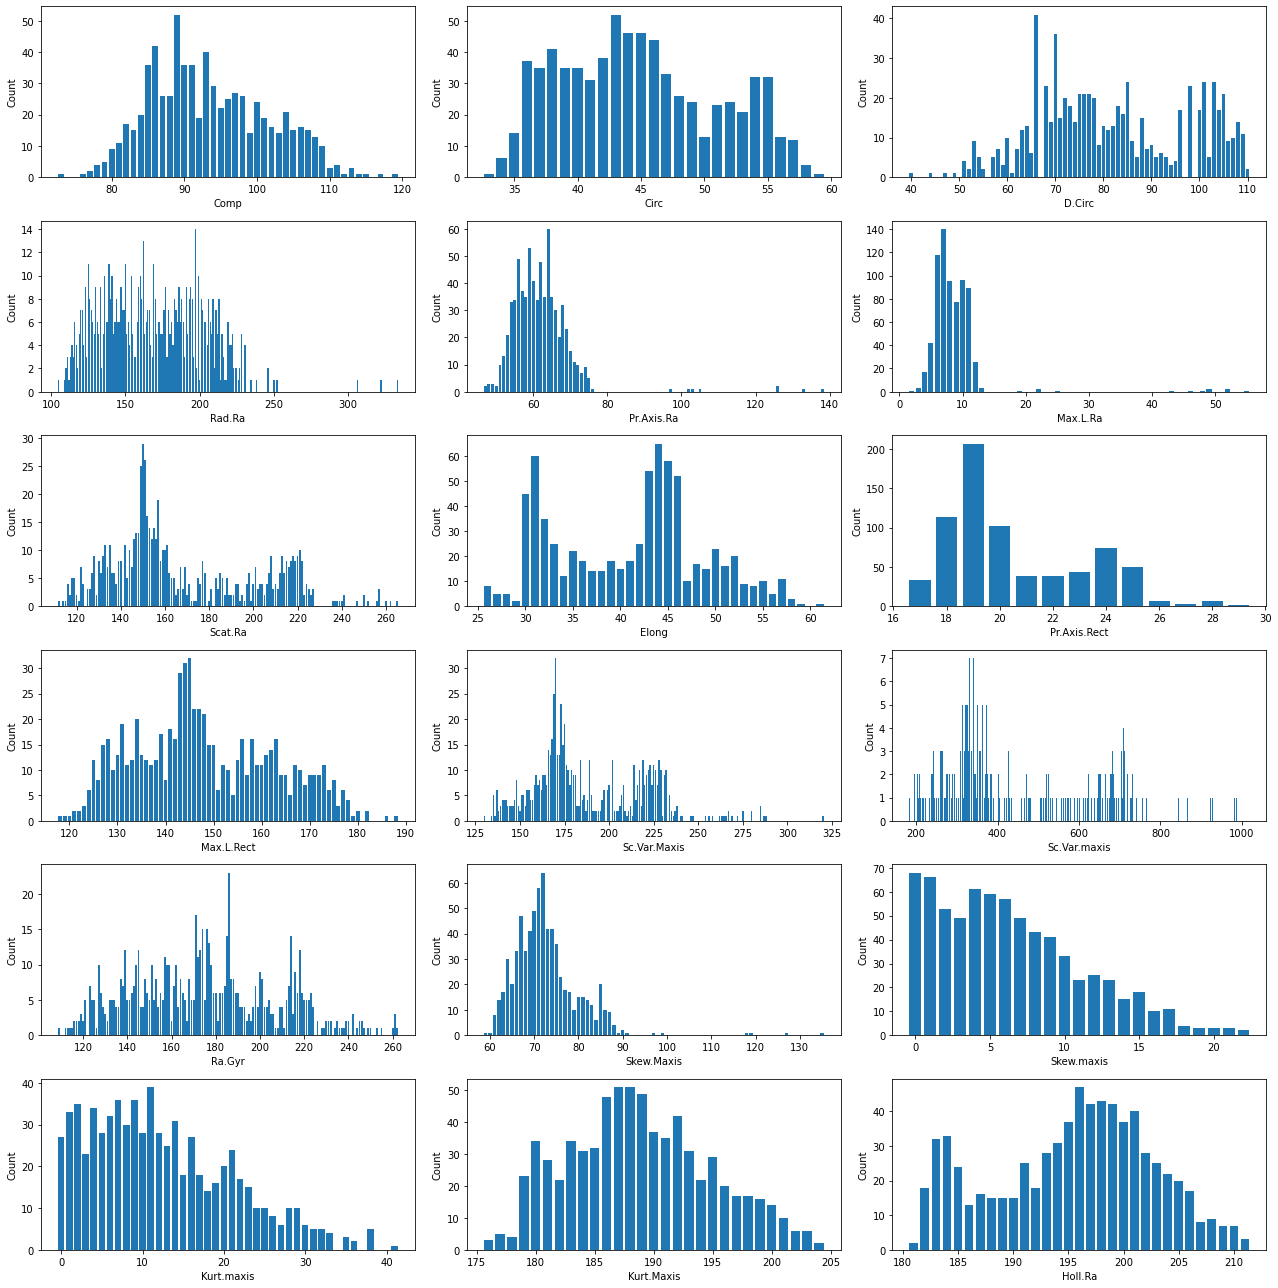

In [ ]:
attributes = ["Comp","Circ","D.Circ","Rad.Ra","Pr.Axis.Ra","Max.L.Ra","Scat.Ra","Elong","Pr.Axis.Rect",
               "Max.L.Rect","Sc.Var.Maxis","Sc.Var.maxis","Ra.Gyr","Skew.Maxis","Skew.maxis","Kurt.maxis",
               "Kurt.Maxis","Holl.Ra"]

fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(18, 18))
axes = axes.flatten()

for i, attr in enumerate(attributes):
    attr_counts = cars[attr].value_counts()
    axes[i].bar(attr_counts.index, attr_counts.values)
    axes[i].set_xlabel(attr)
    axes[i].set_ylabel("Count")

# Hide empty subplots
for j in range(len(attributes), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

## Outlier Detection

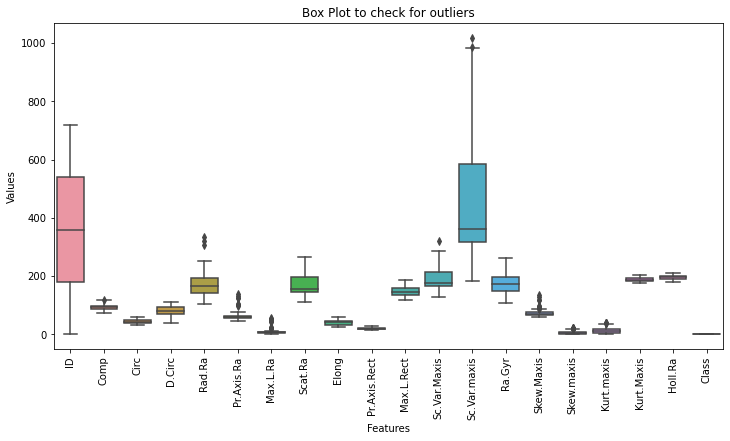

In [ ]:
# Plot box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=cars)
plt.xticks(rotation=90)  # Rotate x-ticks by 90 degrees
plt.title('Box Plot to check for outliers')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

After analyzing the box plot, it is evident that there are minimal outliers present in the data. Furthermore, through careful examination of the data and conducting domain-specific research, it has been determined that these outliers may hold valuable insights and should not be removed.

## Define X and y

Since we focus on predicting the Class outcome of the cars. Our target column denoting class, will be represented as y, while the remaining columns containing characteristics of cars will be represented as X.

In [ ]:
X = cars.drop("Class", axis = 1)
y = cars["Class"]

In [ ]:
#print X
X

,ID,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra
0,1,88,39,70,166,66,7,148,44,19,134,167,332,143,69,5,13,193,201
1,2,85,35,64,129,57,6,116,57,17,125,138,200,123,65,1,23,196,203
2,3,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199
3,4,102,54,98,177,56,10,219,31,25,171,219,706,223,72,5,17,186,196
4,5,87,39,74,152,58,6,151,44,19,136,174,337,140,70,1,33,187,196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,715,111,58,105,183,51,6,265,26,29,174,285,1018,255,85,4,8,181,183
715,716,93,43,76,149,57,7,149,44,19,143,172,335,176,69,14,0,189,194
716,717,90,42,63,144,59,7,131,50,18,142,154,259,162,65,15,3,197,204
717,718,101,56,101,231,72,10,217,31,24,171,232,698,216,72,2,6,187,197


In [ ]:
#print y
y

0      0
1      3
2      3
3      1
4      2
      ..
714    0
715    2
716    3
717    2
718    0
Name: Class, Length: 719, dtype: int64

In [ ]:
#check for variance in the X data
X.var()

ID              43140.000000
Comp               65.794906
Circ               37.826012
D.Circ            241.125240
Rad.Ra           1143.060100
Pr.Axis.Ra         68.213330
Max.L.Ra           24.175987
Scat.Ra          1084.884914
Elong              60.286831
Pr.Axis.Rect        6.558560
Max.L.Rect        211.996277
Sc.Var.Maxis      975.649912
Sc.Var.maxis    30612.743155
Ra.Gyr           1033.594740
Skew.Maxis         56.882590
Skew.maxis         23.582378
Kurt.maxis         76.431507
Kurt.Maxis         36.584621
Holl.Ra            52.347632
dtype: float64

## Train Test Split

To split the data into training and testing sets, we will utilize the train_test_split module. This module allows us to divide our dataset into two separate subsets: one for training our classification model and the other for evaluating its performance.

module : from sklearn.model_selection import train_test_split

In [ ]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

splitting training data into 80% and testing data into 20%, we will set the random_state parameter to 42

In [ ]:
#view train data
X_train

,ID,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra
677,678,96,47,103,215,69,10,200,33,23,147,220,598,200,73,6,6,187,194
56,57,93,40,73,139,58,6,136,49,18,138,166,275,137,73,0,0,187,188
363,364,103,50,98,212,63,9,193,34,22,161,214,567,185,64,5,5,198,204
559,560,103,55,103,211,65,11,212,31,24,165,229,673,249,72,5,16,188,196
530,531,91,49,86,195,63,8,177,37,21,156,203,473,201,67,7,5,192,198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,72,89,47,81,147,64,11,156,44,20,163,170,352,188,76,6,13,184,193
106,107,100,51,104,163,52,10,206,32,23,164,217,631,193,69,5,21,188,196
270,271,90,46,80,143,62,11,159,43,20,156,169,366,186,74,17,7,185,193
435,436,89,36,51,109,52,6,118,57,17,129,137,206,125,80,2,14,181,185


In [ ]:
#view test data
X_test

,ID,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra
120,121,88,44,84,135,55,12,155,44,20,158,176,351,164,75,7,11,183,195
164,165,100,55,101,189,57,10,222,30,25,177,225,731,211,71,7,17,188,197
39,40,97,53,105,225,71,12,221,30,25,167,226,713,202,70,3,20,186,200
551,552,95,47,73,195,70,7,167,38,20,152,184,430,185,69,9,19,200,206
199,200,88,36,78,160,62,6,140,48,18,123,161,287,129,66,4,35,194,202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,133,90,44,69,152,64,7,135,49,18,145,165,272,162,75,3,2,187,191
294,295,98,51,84,207,72,7,184,35,21,161,199,520,198,72,9,11,196,199
344,345,91,38,76,172,61,8,167,40,20,134,196,415,145,71,0,28,189,198
41,42,97,47,88,183,60,7,197,33,23,148,214,596,201,74,8,0,192,191


## Data Preprocessing

Before applying machine learning techniques, it's important to preprocess the data. Preprocessing may include handling missing values, scaling features, and encoding categorical variables if present. 

Since there are no null values in the dataset and all the features are numerical, there is no need to perform null value imputation or encoding. 
However,Since the "ID" column does not provide any meaningful insights regarding the data and is not necessary for our analysis, we will remove this column from the dataset.


### 1. Remove unnecesssary columns

In [ ]:
#drop ID column from train data
X_train = X_train.drop("ID",axis = 1)

#print X_train
X_train

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra
677,96,47,103,215,69,10,200,33,23,147,220,598,200,73,6,6,187,194
56,93,40,73,139,58,6,136,49,18,138,166,275,137,73,0,0,187,188
363,103,50,98,212,63,9,193,34,22,161,214,567,185,64,5,5,198,204
559,103,55,103,211,65,11,212,31,24,165,229,673,249,72,5,16,188,196
530,91,49,86,195,63,8,177,37,21,156,203,473,201,67,7,5,192,198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,89,47,81,147,64,11,156,44,20,163,170,352,188,76,6,13,184,193
106,100,51,104,163,52,10,206,32,23,164,217,631,193,69,5,21,188,196
270,90,46,80,143,62,11,159,43,20,156,169,366,186,74,17,7,185,193
435,89,36,51,109,52,6,118,57,17,129,137,206,125,80,2,14,181,185


In [ ]:
#drop ID column from train data
X_test = X_test.drop("ID",axis = 1)

#print X_test
X_test

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra
120,88,44,84,135,55,12,155,44,20,158,176,351,164,75,7,11,183,195
164,100,55,101,189,57,10,222,30,25,177,225,731,211,71,7,17,188,197
39,97,53,105,225,71,12,221,30,25,167,226,713,202,70,3,20,186,200
551,95,47,73,195,70,7,167,38,20,152,184,430,185,69,9,19,200,206
199,88,36,78,160,62,6,140,48,18,123,161,287,129,66,4,35,194,202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,90,44,69,152,64,7,135,49,18,145,165,272,162,75,3,2,187,191
294,98,51,84,207,72,7,184,35,21,161,199,520,198,72,9,11,196,199
344,91,38,76,172,61,8,167,40,20,134,196,415,145,71,0,28,189,198
41,97,47,88,183,60,7,197,33,23,148,214,596,201,74,8,0,192,191


since the data is not scaled, it is recommended to apply a scaling technique. In this case, we will use the StandardScaler to scale the data and bring all features to a similar range.

### 2. Scaling

libraries :

       import seaborn as sns
       from sklearn.preprocessing import StandardScaler

To visualize whether scaling is necessary for the numerical features, you can create box plots of the features before and after scaling. This will help you assess the range and distribution of the values

In [ ]:
#initialize StandardScaler
SS = StandardScaler()

###### train data

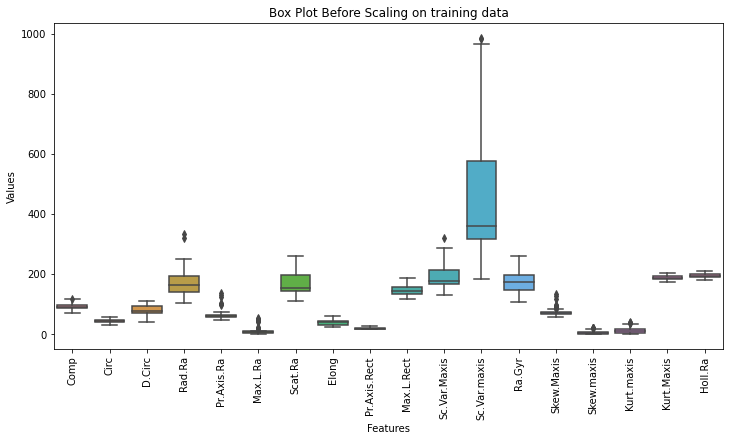

In [ ]:
# Plot box plot before scaling on training data
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train)
plt.xticks(rotation=90)  # Rotate x-ticks by 90 degrees
plt.title('Box Plot Before Scaling on training data')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

The box plots shows huge variations in the ranges and scales of different features, it indicates the need for scaling. We can apply scaling techniques such as StandardScaler or MinMaxScaler to normalize the features and make them comparable. 

In this case we are applying Standard Scaler

In [ ]:
# fit StandardScaler to train data
X_train = SS.fit_transform(X_train)

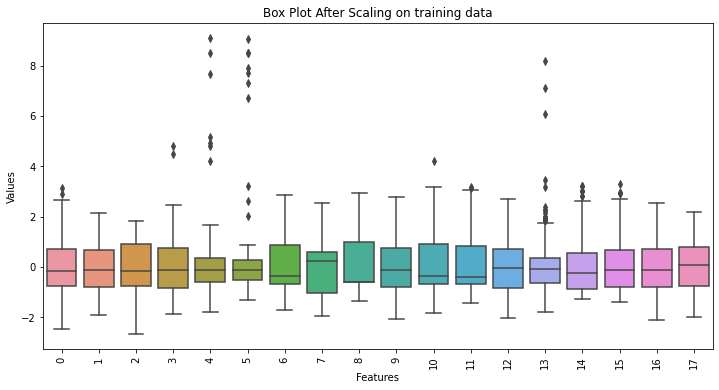

In [ ]:
# Plot box plot after scaling on training data
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train)
plt.xticks(rotation=90)  # Rotate x-ticks by 90 degrees
plt.title('Box Plot After Scaling on training data')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

######  test data

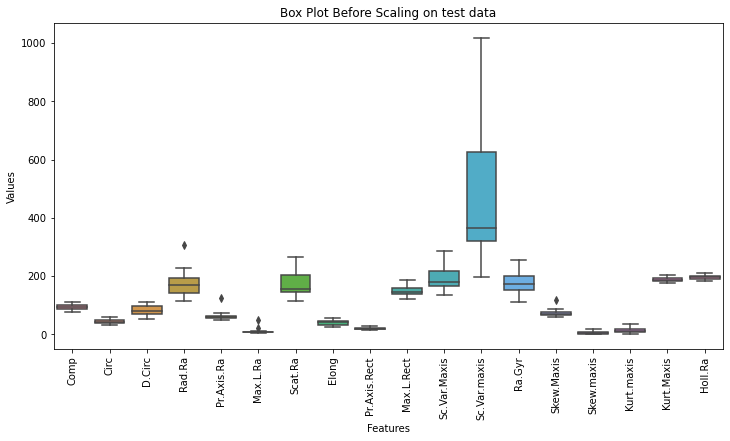

In [ ]:
# Plot box plot before scaling on test data
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_test)
plt.xticks(rotation=90)  # Rotate x-ticks by 90 degrees
plt.title('Box Plot Before Scaling on test data')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [ ]:
#using StandardScaler to test data
X_test = SS.transform(X_test)

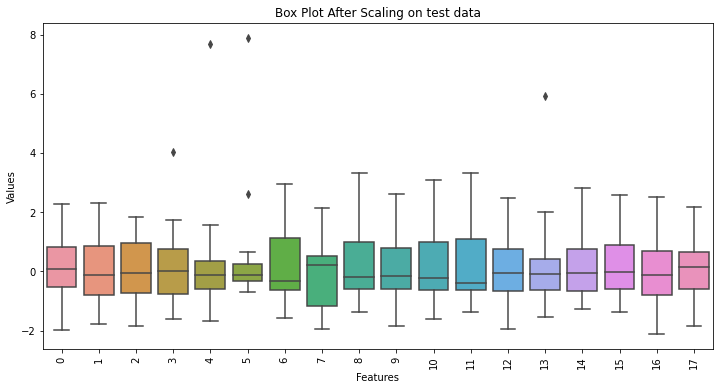

In [ ]:
# Plot box plot After scaling on test data
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_test)
plt.xticks(rotation=90)  # Rotate x-ticks by 90 degrees
plt.title('Box Plot After Scaling on test data')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In the above code, the StandardScaler is applied to standardize the train and test data separately. This ensures that the scaling is performed independently on each set and avoids any leakage of information from the test set into the training process.

### 3. Feature Extraction

for feature extaction I will apply Principal component analysis (PCA) here.
PCA is an unsupervised linear transformation technique which is primarily used for feature extraction and dimensionality reduction.

module: from sklearn.decomposition import PCA

In [ ]:
# Create a PCA object 
pca = PCA()

In [ ]:
# Apply PCA transformation on the training data 
X_train = pca.fit_transform(X_train)


# Apply PCA transformation on the test data 
X_test = pca.transform(X_test)


In [ ]:
# Print the explained variance ratio
print("Explained variance ratio : \n", pca.explained_variance_ratio_)

# Print the shape of the transformed train and test data
print("Shape of X_train_pca : \n", X_train.shape)
print("Shape of X_test_pca : \n", X_test.shape)

Explained variance ratio : 
 [5.25237784e-01 1.62077317e-01 1.10379613e-01 6.56225017e-02
 5.11894243e-02 2.95575758e-02 1.86767200e-02 1.23843819e-02
 8.76291707e-03 5.04707733e-03 3.52801948e-03 2.50008263e-03
 1.92815481e-03 1.14066669e-03 8.90227957e-04 7.01698523e-04
 3.54703740e-04 2.11343759e-05]
Shape of X_train_pca : 
 (575, 18)
Shape of X_test_pca : 
 (144, 18)


In [ ]:
#X_train
print("X_train data : \n",X_train)

#X_test
print("X_test data :\n ",X_test)

X_train data : 
 [[ 2.78077772e+00  3.56631322e-01  6.48823770e-01 ... -8.00632964e-02
  -1.82083300e-02 -1.49313772e-02]
 [-2.87813904e+00  5.70735990e-01 -2.94147016e-01 ...  1.07508103e-01
   1.07179125e-02 -2.90436493e-03]
 [ 2.95484527e+00 -1.97699215e+00 -2.55149399e-02 ... -9.11499953e-02
   7.67655448e-02 -2.29369251e-03]
 ...
 [-4.68899516e-01  7.92578029e-01  2.67366410e-02 ... -2.72195040e-03
  -2.98426617e-02 -2.59946990e-02]
 [-5.23647538e+00  1.60975362e+00 -6.72710783e-01 ... -4.45028781e-02
   6.67178444e-02  3.37560413e-02]
 [-1.76499205e+00  5.36878650e-01  1.28208547e-01 ...  1.00826382e-01
  -5.45225588e-02  1.60677259e-03]]
X_test data :
  [[-9.40449940e-01  9.43605821e-01 -2.35835971e-01 ... -1.83657395e-01
  -9.96989574e-02  3.45360480e-02]
 [ 4.58418563e+00  4.92359946e-01 -1.06357320e+00 ... -7.36009520e-02
   1.33315530e-02  3.20633114e-02]
 [ 4.62461168e+00  5.38543896e-03  6.42975180e-01 ...  3.42199969e-02
  -5.58808279e-02 -1.85966680e-03]
 ...
 [-9.410832

PCA is applied separately on the scaled train and test data using the fit_transform and transform methods. The explained_variance_ratio_ attribute is printed to see the amount of variance explained by each principal component.

Finally, the shape of the transformed train and test data is printed to verify the dimensionality reduction achieved through PCA.

Now that we have completed three important steps in data preprocessing, which include dropping columns, scaling the features using StandardScaler, and performing feature extraction using PCA, our data is now ready to be used for model fitting. These preprocessing steps have prepared the data by removing unnecessary columns, standardizing the feature scales, and reducing the dimensionality through PCA, enabling us to proceed with training our model on this refined and transformed dataset.

## Model Comparison

libraries: 
       
        from sklearn.linear_model import LogisticRegression
        from sklearn.neighbors import KNeighborsClassifier
        from sklearn.tree import DecisionTreeClassifier
        from sklearn.ensemble import RandomForestClassifier
        from sklearn.ensemble import GradientBoostingClassifier

        from sklearn.metrics import f1_score , plot_confusion_matrix,confusion_matrix
        from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

For this multi-class classification problem, there are several machine learning techniques that can be applied to build classification models. Commonly used algorithms for multi-class classification include :

decision trees, 

random forests, 

k Nearest neighbors,

logistic regression, 

and Gradient Boosting.

These algorithms have been widely used and have demonstrated effectiveness in handling multi-class classification tasks. By applying these techniques, we can develop models to accurately classify the cars into their respective classes.

### 1. Logistic regression

In [ ]:
# Initialize  the Logistic Regression model
logistic_regression = LogisticRegression()

#train the Logistic Regression model
logistic_regression.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = logistic_regression.predict(X_test)

# Calculate and print evaluation metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')
confusion_lr = confusion_matrix(y_test, y_pred_lr)

print("Logistic Regression Classifier:")
print(f"Accuracy: {accuracy_lr}")
print(f"F1-score: {f1_lr}")
print(f"Confusion Matrix:\n{confusion_lr}")
print("----------------------------------------")


Logistic Regression Classifier:
Accuracy: 0.7777777777777778
F1-score: 0.7705843260775286
Confusion Matrix:
[[34  0  0  1]
 [ 1 19 19  1]
 [ 1  8 24  1]
 [ 0  0  0 35]]
----------------------------------------


C:\Users\avino\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 2. Decision Tree Classifier

In [ ]:
# Initialize  the Decision Tree model
decision_tree = DecisionTreeClassifier()

#train the Decision Tree model
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = decision_tree.predict(X_test)

# Calculate and print evaluation metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
confusion_dt = confusion_matrix(y_test, y_pred_dt)

print("Decision Tree Classifier:")
print(f"Accuracy: {accuracy_dt}")
print(f"F1-score: {f1_dt}")
print(f"Confusion Matrix:\n{confusion_dt}")
print("----------------------------------------")


Decision Tree Classifier:
Accuracy: 0.6666666666666666
F1-score: 0.6681815551346801
Confusion Matrix:
[[29  2  2  2]
 [ 0 18 16  6]
 [ 0 11 19  4]
 [ 0  1  4 30]]
----------------------------------------


### 3. K Nearest Neighbors

In [ ]:
# Initialize the K Neighbors Classifier model
knn = KNeighborsClassifier()

#train the K Neighbors Classifier model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn.predict(X_test)

# Calculate and print evaluation metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
confusion_knn = confusion_matrix(y_test, y_pred_knn)

print("K Neighbors Classifier :")
print(f"Accuracy: {accuracy_knn}")
print(f"F1-score: {f1_knn}")
print(f"Confusion Matrix:\n{confusion_knn}")
print("----------------------------------------")


K Neighbors Classifier :
Accuracy: 0.7430555555555556
F1-score: 0.7331294091710758
Confusion Matrix:
[[34  0  0  1]
 [ 3 17 18  2]
 [ 2  6 25  1]
 [ 1  0  3 31]]
----------------------------------------


### 4. Random Forest Classifier

In [ ]:
# Initialize the Random Forest model
random_forest = RandomForestClassifier()

#train the Random Forest model
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = random_forest.predict(X_test)

# Calculate and print evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
confusion_rf = confusion_matrix(y_test, y_pred_rf)

print("Random Forest Classifier:")
print(f"Accuracy: {accuracy_rf}")
print(f"F1-score: {f1_rf}")
print(f"Confusion Matrix:\n{confusion_rf}")
print("----------------------------------------")


Random Forest Classifier:
Accuracy: 0.8194444444444444
F1-score: 0.8168668668668668
Confusion Matrix:
[[34  0  0  1]
 [ 0 27 11  2]
 [ 1  8 23  2]
 [ 0  0  1 34]]
----------------------------------------


### 5. Gradient Boosting

In [ ]:
# Initialize the Gradient Boosting model
gb = GradientBoostingClassifier()

#train the Gradient Boosting model
gb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb.predict(X_test)

# Calculate and print evaluation metrics
accuracy_gb = accuracy_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb, average='weighted')
confusion_gb = confusion_matrix(y_test, y_pred_gb)

print("Gradient Boosting Classifier:")
print(f"Accuracy: {accuracy_gb}")
print(f"F1-score: {f1_gb}")
print(f"Confusion Matrix:\n{confusion_gb}")
print("----------------------------------------")


Gradient Boosting Classifier:
Accuracy: 0.7708333333333334
F1-score: 0.7666780851692261
Confusion Matrix:
[[34  0  0  1]
 [ 0 22 17  1]
 [ 1 10 21  2]
 [ 1  0  0 34]]
----------------------------------------


Based on the results obtained from the different classification models, we can compare their performance and select the top 4 models for further tuning. Here's a comparison of the models:

Logistic Regression Classifier:

        Accuracy: 0.7777
        F1-score: 0.7705

Decision Tree Classifier:

        Accuracy: 0.6666
        F1-score: 0.6681
        
K Neighbors Classifier:

        Accuracy: 0.7430
        F1-score: 0.7331
        
Random Forest Classifier:

        Accuracy: 0.8194
        F1-score: 0.8168
        
Gradient Boosting Classifier:

        Accuracy: 0.7708
        F1-score: 0.7666
        
Based on the evaluation metrics, the top 4 models for further tuning are:

Logistic Regression Classifier:

    * This model hasrelatively  high accuracy and F1-score .
    * Logistic Regression is a well-established algorithm for classification tasks.
    * It provides a good balance between simplicity and performance.
    
Gradient Boosting Classifier:

    * This model has a relatively high accuracy and F1-score.
    * Gradient Boosting is an ensemble method that combines weak classifiers to create a strong classifier.
    * It can handle complex relationships between features and has the potential for high performance.
    
K Neighbors Classifier:

    * This model also shows decent accuracy and F1-score.
    * K Neighbors Classifier is a non-parametric algorithm that can capture non-linear relationships.
    * It considers the similarity of instances in the feature space and is robust to noise.
    
Random Forest Classifier:

    * The Random Forest Classifier has the highest accuracy and F1-score among all the models.
    * Random Forest is an ensemble learning algorithm that combines multiple decision trees.
    * It is known for its ability to handle complex data and capture non-linear relationships.
    * Random Forest can also handle high-dimensional feature spaces and provides built-in feature importance measures.
    * The model's robustness against overfitting and its capability to handle both categorical and numerical features make       it a suitable choice.
    
These four models are chosen based on their performance on the evaluation metrics, their suitability for multi-class  classification, and their unique characteristics.    
It's important to further tune these models to optimize their hyperparameters and improve their performance.

By focusing on these top models, we can allocate our resources effectively for parameter tuning, optimization, and further experimentation to enhance their performance on the dataset.

## Hyperparameter Tuning

module : from sklearn.model_selection import GridSearchCV

Hyperparameter tuning is the process of finding the optimal values for the hyperparameters of a machine learning algorithm. Hyperparameters are configuration parameters that are set before the learning process begins and are not learned from the data. They control the behavior of the learning algorithm and can have a significant impact on the performance of the model.

The goal of hyperparameter tuning is to find the combination of hyperparameter values that results in the best performance of the model on unseen data. It helps to improve the model's accuracy, generalization, and robustness.

There are several methods for hyperparameter tuning, including:

    Grid Search CV
    Random Search CV
    Bayesian Optimization
    Genetic Algorithms
    
In this case I am using GridSearchCV and Random Search CV

### 1. Logistic Regression Classifier 

In [ ]:
# Define the parameter grid for logistic regression
param_grid_lr = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Initialize the logistic regression model
logreg = LogisticRegression()

# Perform grid search for parameter tuning
grid_search_lr = GridSearchCV(logreg, param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)

# Get the best parameters and best score
best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_

# Train the logistic regression model with the best parameters
lr_best = LogisticRegression(**best_params_lr)
lr_best.fit(X_train, y_train)


C:\Users\avino\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\avino\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\avino\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\avino\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\avino\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\avino\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

LogisticRegression(C=10, penalty='l1', solver='liblinear')

In [ ]:
# Make predictions on the test set
y_pred_logreg = lr_best.predict(X_test)

# Calculate evaluation metrics
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg, average='weighted')
confusion_logreg = confusion_matrix(y_test, y_pred_logreg)

# Print the evaluation results
print("Logistic Regression Classifier:")
print(f"Accuracy: {accuracy_logreg}")
print(f"F1-score: {f1_logreg}")
print(f"Confusion Matrix:\n{confusion_logreg}")
print("----------------------------------------")

Logistic Regression Classifier:
Accuracy: 0.7708333333333334
F1-score: 0.7664475805327255
Confusion Matrix:
[[34  1  0  0]
 [ 0 19 20  1]
 [ 1  9 23  1]
 [ 0  0  0 35]]
----------------------------------------


### 2. Gradient Boosting Classifier 

In [ ]:
# Define the parameter grid for gradient boosting
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Initialize the gradient boosting model
gb = GradientBoostingClassifier()

# Perform randomized search for parameter tuning
random_search_gb = RandomizedSearchCV(gb, param_grid_gb, cv=5, scoring='accuracy')
random_search_gb.fit(X_train, y_train)

# Get the best parameters and best score
best_params_gb = random_search_gb.best_params_
best_score_gb = random_search_gb.best_score_

# Train the gradient boosting model with the best parameters
gb_best = GradientBoostingClassifier(**best_params_gb)
gb_best.fit(X_train, y_train)


GradientBoostingClassifier(learning_rate=0.05, n_estimators=300)

In [ ]:
# Make predictions on the test set
y_pred_gb = gb_best.predict(X_test)

# Calculate evaluation metrics
accuracy_gradboost = accuracy_score(y_test, y_pred_gb)
f1_gradboost = f1_score(y_test, y_pred_gb, average='weighted')
confusion_gradboost = confusion_matrix(y_test, y_pred_gb)

# Print the evaluation results
print("Gradient Boosting Classifier:")
print(f"Accuracy: {accuracy_gradboost}")
print(f"F1-score: {f1_gradboost}")
print(f"Confusion Matrix:\n{confusion_gradboost}")
print("----------------------------------------")

Gradient Boosting Classifier:
Accuracy: 0.7569444444444444
F1-score: 0.7537510599705114
Confusion Matrix:
[[34  0  0  1]
 [ 0 21 19  0]
 [ 1 11 20  2]
 [ 1  0  0 34]]
----------------------------------------


### 3. K Neighbors Classifier 

In [ ]:
# Define the parameter grid for K Neighbors Classifier
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Initialize the K Neighbors Classifier model
knn = KNeighborsClassifier()

# Perform grid search for parameter tuning
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

# Get the best parameters and best score
best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_

# Train the K Neighbors Classifier model with the best parameters
knn_best = KNeighborsClassifier(**best_params_knn)
knn_best.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')

In [ ]:
# Make predictions on the test set
y_pred_knn = knn_best.predict(X_test)

# Calculate evaluation metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
confusion_knn = confusion_matrix(y_test, y_pred_knn)

# Print the evaluation results
print("K Neighbors Classifier:")
print(f"Accuracy: {accuracy_knn}")
print(f"F1-score: {f1_knn}")
print(f"Confusion Matrix:\n{confusion_knn}")
print("----------------------------------------")

K Neighbors Classifier:
Accuracy: 0.7847222222222222
F1-score: 0.7732989993263966
Confusion Matrix:
[[35  0  0  0]
 [ 2 18 18  2]
 [ 1  7 25  1]
 [ 0  0  0 35]]
----------------------------------------


### 4. Random Forest Classifier

In [ ]:
# Create and fit the random forest model with tuned hyperparameters
rf = RandomForestClassifier(n_estimators=200, max_depth=7)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
confusion_rf = confusion_matrix(y_test, y_pred_rf)

# Print the evaluation results
print("Random Forest Classifier:")
print(f"Accuracy: {accuracy_rf}")
print(f"F1-score: {f1_rf}")
print(f"Confusion Matrix:\n{confusion_rf}")
print("----------------------------------------")


Random Forest Classifier:
Accuracy: 0.8055555555555556
F1-score: 0.7987429737429736
Confusion Matrix:
[[34  0  0  1]
 [ 2 26  9  3]
 [ 2  8 22  2]
 [ 1  0  0 34]]
----------------------------------------


### Feature importances

Feature importance refers to a technique used to determine the relevance or importance of each feature (or variable) in a dataset in relation to the target variable. It helps in understanding which features have the most significant impact on the target variable and can be used to identify the key drivers of a particular outcome.

Random Forest is a machine learning algorithm that is often used to calculate feature importances. It works by constructing multiple decision trees and averaging their predictions to make accurate predictions. Random Forest calculates feature importances based on the average impurity reduction each feature provides across all the decision trees in the forest.

The feature importances provided by Random Forest are relative scores that indicate the importance of each feature. A higher score suggests a stronger influence of the feature on the target variable, while a lower score suggests less importance.

By analyzing the feature importances, we can gain insights into the relative importance of different features in the dataset. This information can help us make informed decisions about feature selection, feature engineering, or understanding the underlying relationships in the data. It can also guide us in identifying the most relevant features to include in our models for better predictive performance.

In [ ]:
#convertinng X_train into pandas dataframe
X_train1 = pd.DataFrame(X_train,columns = ["Comp","Circ","D.Circ","Rad.Ra","Pr.Axis.Ra","Max.L.Ra","Scat.Ra","Elong","Pr.Axis.Rect","Max.L.Rect","Sc.Var.Maxis","Sc.Var.maxis","Ra.Gyr","Skew.Maxis","Skew.maxis","Kurt.maxis","Kurt.Maxis","Holl.Ra"])


In [ ]:
#check for feature importance
rf.feature_importances_

array([0.11694458, 0.0768261 , 0.05376439, 0.0433858 , 0.04615885,
       0.10884629, 0.05462142, 0.07427049, 0.03984355, 0.03677785,
       0.05793908, 0.05186493, 0.05324494, 0.04987074, 0.04316558,
       0.03294242, 0.02968791, 0.02984508])

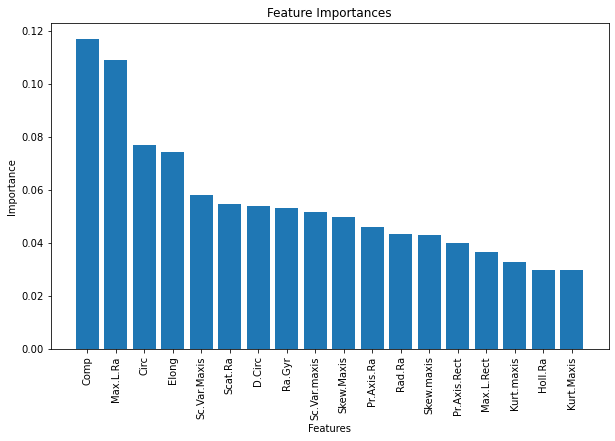

In [ ]:
# Get feature importances
importances = rf.feature_importances_
feature_names = X_train1.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train1.shape[1]), importances[indices])
plt.xticks(range(X_train1.shape[1]), feature_names[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()


After analyzing the feature importances plot, it is evident that the "Comp" feature holds the highest importance among all the features in the dataset. On the other hand, the "Kurt.Maxis" feature has the lowest importance.

## Model Evaluation and Comparison

### before tuning   and after tuning comparison

Logistic Regression Classifier:
Accuracy: 0.7777777777777778
F1-score: 0.7705843260775286

Logistic Regression Classifier:
Accuracy: 0.7708333333333334
F1-score: 0.7664475805327255

------------------------------------------------

K Neighbors Classifier :
Accuracy: 0.7430555555555556
F1-score: 0.7331294091710758

K Neighbors Classifier:
Accuracy: 0.7847222222222222
F1-score: 0.7732989993263966

----------------------------------------

Gradient Boosting Classifier:
Accuracy: 0.7708333333333334
F1-score: 0.7666780851692261

Gradient Boosting Classifier:
Accuracy: 0.7569444444444444
F1-score: 0.7537510599705114

----------------------------------------------
    
Random Forest Classifier:
Accuracy: 0.8194444444444444
F1-score: 0.8168668668668668

Random Forest Classifier:
Accuracy: 0.8055555555555556
F1-score: 0.7987429737429736
 
----------------------------------------


## Final Model

In [ ]:
# Initialize the Random Forest model
random_forest = RandomForestClassifier()

#train the Random Forest model
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = random_forest.predict(X_test)

# Calculate and print evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
confusion_rf = confusion_matrix(y_test, y_pred_rf)

print("Random Forest Classifier:")
print(f"Accuracy: {accuracy_rf}")
print(f"F1-score: {f1_rf}")
print(f"Confusion Matrix:\n{confusion_rf}")
print("----------------------------------------")

Random Forest Classifier:
Accuracy: 0.8194444444444444
F1-score: 0.8143262691418836
Confusion Matrix:
[[34  0  0  1]
 [ 1 24 13  2]
 [ 1  5 26  2]
 [ 1  0  0 34]]
----------------------------------------
